In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Pre-processing methods for the dataset

def get_array_of_matrix(dataset):
    array_of_images = []
    for row in dataset:
        row = np.asarray(row)
        matrix = np.reshape(row, (48, 48))
        array_of_images.append(matrix)
    return array_of_images


def crop_dataset(dataset, row, clmn):
    copped_dataset = []
    for image in dataset:
        y, x = image.shape
        first_x = x//2-(row//2)
        first_y = y//2-(clmn//2)
        copped_dataset.append(image[first_y:first_y + clmn, first_x:first_x + row])
    return copped_dataset


def reshape_dataset(dataset):
    reshaped_dataset = []
    for image in dataset:
        image = cv.resize(image, (48, 48)) # un po' bruttino
        image = image.flatten()
        reshaped_dataset.append(image)
    # reshaped_dataset = np.reshape(reshaped_dataset, (12660, 2304)) # un po' bruttino
    return reshaped_dataset


def apply_adaptive_threshold(dataset):
    dataset_with_filter = []
    for image in dataset:
        image = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
        image = image.flatten()
        dataset_with_filter.append(image)
    dataset_with_filter = np.reshape(dataset_with_filter, (12660, 1600))
    return dataset_with_filter

In [3]:
x_train_gr_smpl = pd.read_csv("./datasets/x_train_gr_smpl.csv", delimiter=",", dtype=np.uint8)
y_train_smpl = pd.read_csv("./datasets/y_train_smpl.csv", delimiter=",", dtype=np.uint8)

In [4]:
dataset = np.asmatrix(x_train_gr_smpl)
aom_dataset = get_array_of_matrix(dataset)
cropped_dataset = crop_dataset(aom_dataset, 40, 40) # un po' bruttino
#new_dataset = reshape_dataset(cropped_dataset)
new_dataset = apply_adaptive_threshold(cropped_dataset)

In [5]:
# add y_train_smpl to new_dataset ---KARAN
dataset = np.append(new_dataset, y_train_smpl, axis=1)
x = dataset[:, 0:1599]
y = dataset[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=17)

In [6]:
# Create a pandas dataframe  
dataframe = pd.DataFrame(data=dataset, index=None,columns=None,dtype=np.uint8, copy=False)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
dataframe.rename(columns ={1600:"Label"}, inplace =True) #Renaming the last column as "Label"
scaler.fit(dataframe.drop("Label", axis=1))# Fit the data to all columns except Labels
scaled_features = scaler.transform(dataframe.drop("Label", axis=1))
df_feat = pd.DataFrame(scaled_features,columns=dataframe.columns[:-1])

C:\Users\singh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
X = df_feat
y = dataframe["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.manifold import TSNE

In [12]:
x_train_emb3 = TSNE(n_components=3, perplexity=35).fit_transform(X_train)

In [13]:
print(x_train_emb3.shape)

(8862, 3)


In [14]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


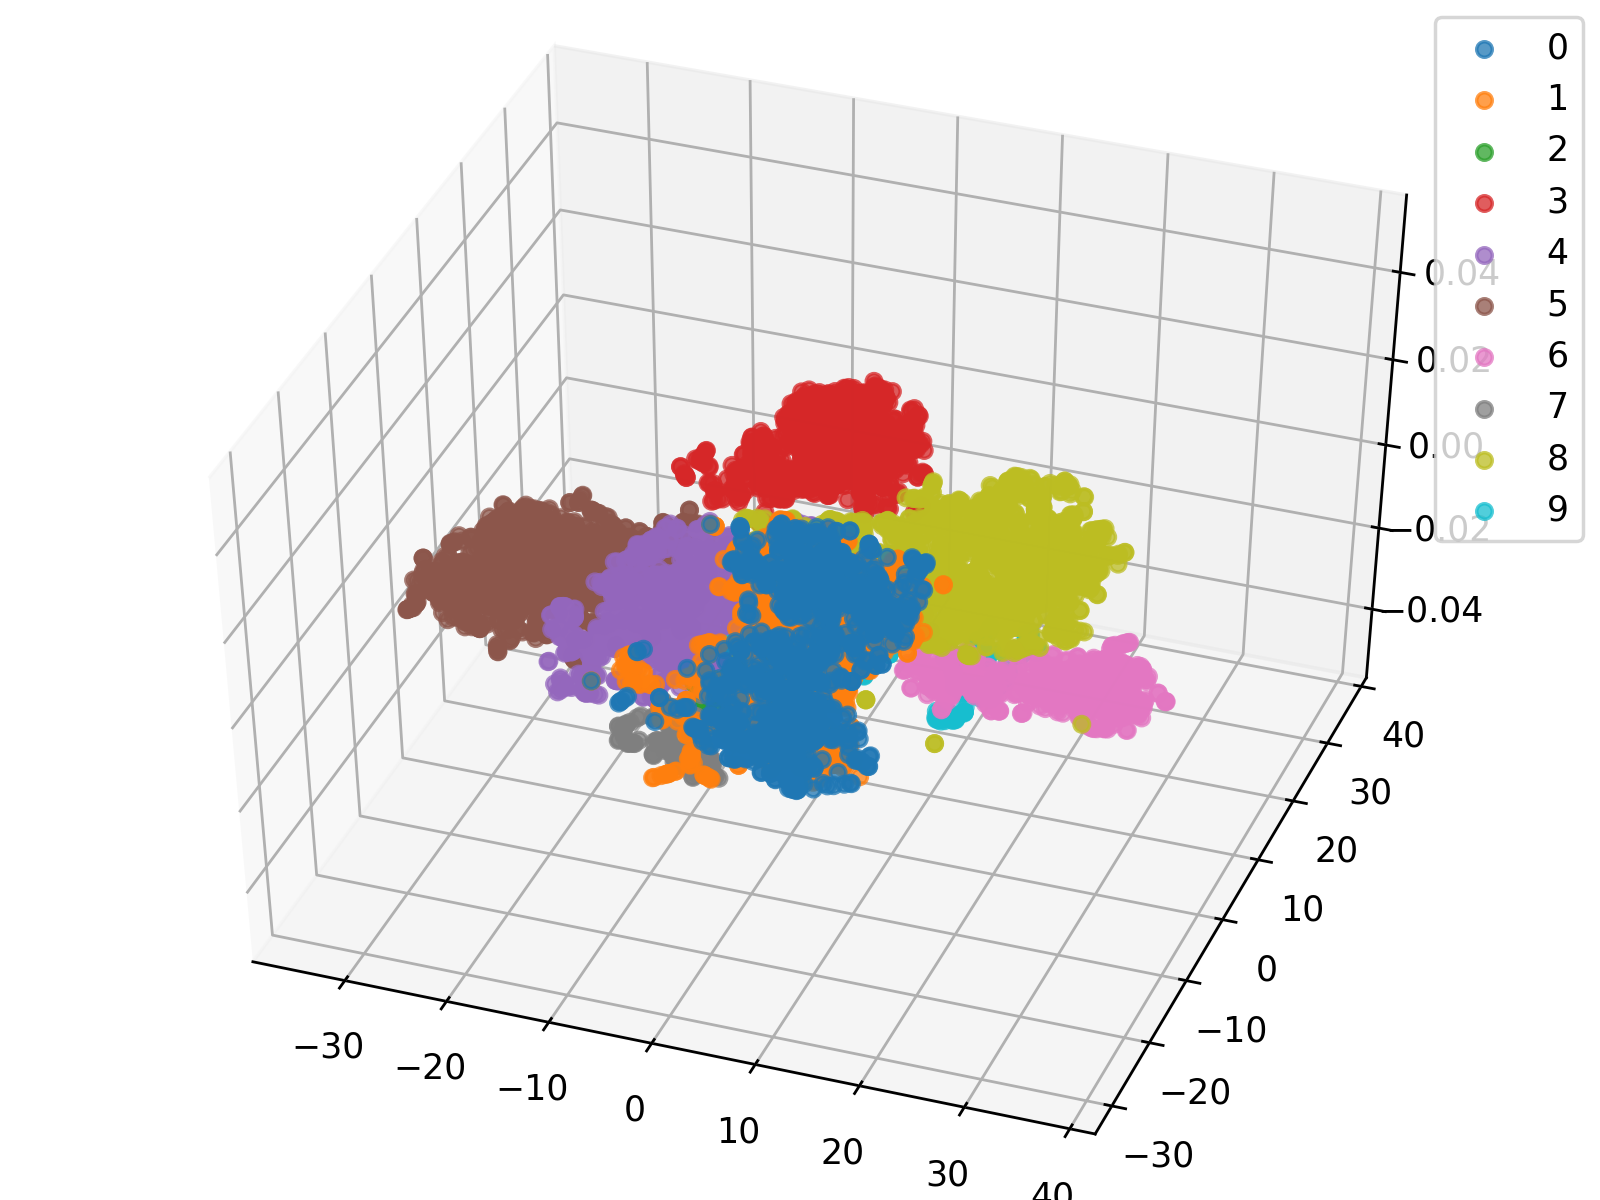

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
for label in range(10):
    x_train_tmp = x_train_emb3[y_train==label]
    ax.scatter(x_train_tmp[:,0],x_train_tmp[:,1],alpha=0.75, label=label)
ax.legend()
plt.show()